# Problem set 2 - Predicting poverty

El objetivo es clasificar, es decir,  predecir directamente ceros (no pobre) y unos (pobre). Para ello definimos

\begin{align}
Poor=f(x) + u
\end{align}

where $Poor=I(Inc\leq Pl)$


# Dataset - importación y limpieza

In [1]:
#Para importar datos desde escritorio personal (no supe importarlo directamente desde kangle)
from google.colab import files
uploaded = files.upload()

Saving test_hogares.csv to test_hogares.csv
Saving test_personas.csv to test_personas.csv
Saving train_hogares.csv to train_hogares.csv
Saving train_personas.csv to train_personas.csv


In [2]:
#Importamos y definimos bases de entrenamiento
import pandas as pd
db_personas_train = pd.read_csv('train_personas.csv')
db_hogares_train = pd.read_csv('train_hogares.csv')

In [3]:
#Filtramos base personas solo para jefes ded hogar
df_personas_filtrado = db_personas_train[db_personas_train['P6050'] == 1]

In [4]:
#Anexamos bases
db_final_train = pd.merge(df_personas_filtrado, db_hogares_train, on='id', how='inner')

In [40]:
#Chequeamos desbalanceo
db_final_train['Pobre'].value_counts(normalize=True) * 100

0    79.980601
1    20.019399
Name: Pobre, dtype: float64

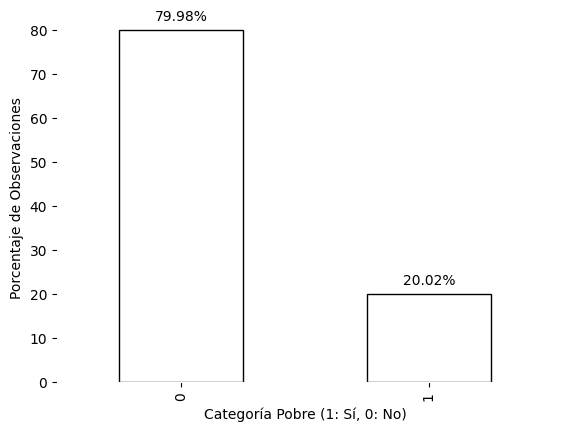

In [ ]:
# Graficar la variable de pobreza
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que db_final_train es tu DataFrame
conteo_categorias = db_final_train['Pobre'].value_counts(normalize=True) * 100  # Normalizar a porcentaje
ax = conteo_categorias.plot(kind='bar', color=['white', 'white'], edgecolor='black')  # Color blanco y borde blanco

# Personalizar el gráfico
plt.xlabel('Categoría Pobre (1: Sí, 0: No)')
plt.ylabel('Porcentaje de Observaciones')

# Mostrar el porcentaje en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Fondo blanco
ax.set_facecolor('white')
ax.spines['bottom'].set_color('white')  # Borde inferior blanco
ax.spines['top'].set_color('white')     # Borde superior blanco
ax.spines['right'].set_color('white')   # Borde derecho blanco
ax.spines['left'].set_color('white')    # Borde izquierdo blanco

# Mostrar el gráfico
plt.show()

In [13]:
num_obs, num_vars = db_final_train.shape

print(f"Número de observaciones: {num_obs}")
print(f"Número de variables: {num_vars}")

Número de observaciones: 164960
Número de variables: 157


In [5]:
pd.set_option('display.max_rows', None)
# Muestra la cantidad de valores faltantes por variable
missing_values = db_final_train.isnull().sum()
# Muestra el resultado
print(missing_values)

id                  0
Orden               0
Clase_x             0
Dominio_x           0
Estrato1            0
P6020               0
P6040               0
P6050               0
P6090               1
P6100            9723
P6210               0
P6210s1             1
P6240               1
Oficio          47804
P6426           47804
P6430           47804
P6500          113110
P6510          113110
P6510s1        113152
P6510s2        161075
P6545          113110
P6545s1        113155
P6545s2        164013
P6580          113110
P6580s1        113165
P6580s2        163076
P6585s1        113110
P6585s1a1      113177
P6585s1a2      163299
P6585s2        113110
P6585s2a1      113264
P6585s2a2      141439
P6585s3        113110
P6585s3a1      113169
P6585s3a2      151692
P6585s4        113110
P6585s4a1      113110
P6585s4a2      164731
P6590          113110
P6590s1        113110
P6600          113110
P6600s1        113110
P6610          113110
P6610s1        113110
P6620          113110
P6620s1   

In [6]:
variables_de_interes = ['Iof1', 'Iof1', 'Ingtot', 'Ingtotob', 'Iof6', 'Iof3i', 'Iof3h', 'Iof2', 'Pet', 'P7510s7a1', 'P7510s6a1', 'P7510s5a1', 'P7510s3a1', 'P7510s2a1', 'P7510s1a1', 'P7505', 'P7500s3a1', 'P7500s2a1', 'P7500s1a1', 'P7495', 'P6240', 'P6210s1', 'P6090']
# Seleccionar las observaciones con valores faltantes en las variables de interés
observaciones_con_missing = db_final_train[db_final_train[variables_de_interes].isnull().any(axis=1)]
# Imprimir las observaciones con valores faltantes
print(observaciones_con_missing[['id'] + variables_de_interes])

                             id  Iof1  Iof1  Ingtot  Ingtotob  Iof6  Iof3i  \
71355  9c5426b952ef0ea87c17395f   NaN   NaN     NaN       NaN   NaN    NaN   

       Iof3h  Iof2  Pet  ...  P7510s2a1  P7510s1a1  P7505  P7500s3a1  \
71355    NaN   NaN  NaN  ...        NaN        NaN    NaN        NaN   

       P7500s2a1  P7500s1a1  P7495  P6240  P6210s1  P6090  
71355        NaN        NaN    NaN    NaN      NaN    NaN  

[1 rows x 24 columns]


In [7]:
db_final_train_nuevo = db_final_train[db_final_train['id'] != '9c5426b952ef0ea87c17395f']

In [8]:
pd.set_option('display.max_rows', None)
# Muestra la cantidad de valores faltantes por variable
missing_values = db_final_train_nuevo.isnull().sum()
# Muestra el resultado
print(missing_values)

id                  0
Orden               0
Clase_x             0
Dominio_x           0
Estrato1            0
P6020               0
P6040               0
P6050               0
P6090               0
P6100            9722
P6210               0
P6210s1             0
P6240               0
Oficio          47803
P6426           47803
P6430           47803
P6500          113109
P6510          113109
P6510s1        113151
P6510s2        161074
P6545          113109
P6545s1        113154
P6545s2        164012
P6580          113109
P6580s1        113164
P6580s2        163075
P6585s1        113109
P6585s1a1      113176
P6585s1a2      163298
P6585s2        113109
P6585s2a1      113263
P6585s2a2      141438
P6585s3        113109
P6585s3a1      113168
P6585s3a2      151691
P6585s4        113109
P6585s4a1      113109
P6585s4a2      164730
P6590          113109
P6590s1        113109
P6600          113109
P6600s1        113109
P6610          113109
P6610s1        113109
P6620          113109
P6620s1   

In [9]:
df_sin_missing_variables = db_final_train_nuevo.dropna(axis=1)

In [10]:
db_final_train_nuevo = db_final_train_nuevo.dropna(axis=1)

In [11]:
pd.set_option('display.max_rows', None)
# Muestra la cantidad de valores faltantes por variable
missing_values = db_final_train_nuevo.isnull().sum()
# Muestra el resultado
print(missing_values)

id             0
Orden          0
Clase_x        0
Dominio_x      0
Estrato1       0
P6020          0
P6040          0
P6050          0
P6090          0
P6210          0
P6210s1        0
P6240          0
P7495          0
P7500s1a1      0
P7500s2a1      0
P7500s3a1      0
P7505          0
P7510s1a1      0
P7510s2a1      0
P7510s3a1      0
P7510s5a1      0
P7510s6a1      0
P7510s7a1      0
Pet            0
Iof1           0
Iof2           0
Iof3h          0
Iof3i          0
Iof6           0
Ingtotob       0
Ingtot         0
Fex_c_x        0
Depto_x        0
Fex_dpto_x     0
Clase_y        0
Dominio_y      0
P5000          0
P5010          0
P5090          0
Nper           0
Npersug        0
Ingtotug       0
Ingtotugarr    0
Ingpcug        0
Li             0
Lp             0
Pobre          0
Indigente      0
Npobres        0
Nindigentes    0
Fex_c_y        0
Depto_y        0
Fex_dpto_y     0
dtype: int64


In [12]:
missing_values.to_excel('missing_values_report.xlsx')

In [ ]:
from google.colab import files

# Descargar el archivo desde Colab
files.download('missing_values_report.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
num_obs, num_vars = db_final_train_nuevo.shape

print(f"Número de observaciones: {num_obs}")
print(f"Número de variables: {num_vars}")

Número de observaciones: 164959
Número de variables: 53


In [14]:
variables_seleccionadas = ['Clase_x', 'Dominio_x', 'P6020', 'P6040', 'P6090', 'P6210', 'P6240', 'P7495', 'P7505', 'Pet', 'P5000', 'P5010', 'P5090', 'Pobre', 'Nper', 'Ingpcug']
db_final_train_nuevo = db_final_train_nuevo[variables_seleccionadas]

In [15]:
db_final_train_nuevo['Clase_x'] = db_final_train_nuevo['Clase_x'].replace(2, 0)
db_final_train_nuevo['P7505'] = db_final_train_nuevo['P7505'].replace(2, 0)
db_final_train_nuevo['P7495'] = db_final_train_nuevo['P7495'].replace(2, 0)
db_final_train_nuevo['P6020'] = db_final_train_nuevo['P6020'].replace(2, 0)

In [16]:
from sklearn.model_selection import train_test_split


# Separate the independent and dependent variables
X = db_final_train_nuevo.drop(['Pobre', 'Ingpcug'], axis=1)
y = db_final_train_nuevo['Pobre']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify=y
                                    )


In [18]:
# One-hot encode categorical variables
# One-hot encode categorical variables
X_train_to_encode=X_train.drop(['Nper', 'P6040', 'P5000', 'P5010'], axis=1)
X_test_to_encode=X_test.drop(['Nper', 'P6040', 'P5000', 'P5010'], axis=1)

X_train_encoded = pd.get_dummies(X_train_to_encode,columns=['P6090', 'P6210','P6240','Dominio_x', 'P5090'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test_to_encode,columns=['P6090', 'P6210','P6240','Dominio_x', 'P5090'], drop_first=True)

# Ensure the same columns in both train and test sets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [20]:
from sklearn.preprocessing import StandardScaler


# Create a list of numerical columns (i.e., columns to be scaled)
numerical_columns = X_train.columns.drop(['Clase_x', 'Dominio_x', 'P6020', 'P6090', 'P6210', 'P6240', 'P7495', 'P7505', 'Pet', 'P5090'])
numerical_columns
# # Initialize the StandardScaler
scaler = StandardScaler()

# # Fit the scaler to the numerical columns of the training data and transform
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
# # Transform the test data
X_test_scaled = scaler.fit_transform(X_test[numerical_columns])

# Convert the scaled arrays back into DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns, index=X_test.index)

# Reset the index of the DataFrames to align them correctly
X_train_scaled_df.reset_index(drop=True, inplace=True)
X_test_scaled_df.reset_index(drop=True, inplace=True)
X_train_encoded.reset_index(drop=True, inplace=True)
X_test_encoded.reset_index(drop=True, inplace=True)

# Combine scaled numerical and encoded categorical features
X_train = pd.concat([X_train_scaled_df, X_train_encoded], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test_encoded], axis=1)

## Estimación Logit

\begin{align}
p_i &=\frac{e^{X_i\beta}}{1+e^{X_i\beta}}
\end{align}


In [41]:
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model
logit_model = LogisticRegression(max_iter=200 )
logit_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

## Prediction


\begin{align}
\hat{p}_i &=\frac{e^{X_i\hat{\beta}}}{1+e^{X_i\hat{\beta}}}
\end{align}

In [42]:
y_test=pd.DataFrame(y_test)
y_test.head()

,Pobre
15546,0
80379,0
163266,1
157907,0
64283,0


In [43]:
# Predict the probabilities
y_test['prob_hat'] = logit_model.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head(10)

ValueError: ignored

In [ ]:
# Define the rule (threshold)
rule = 0.5

# Create the predicted class labels based on the rule
y_test['Pobre_hat_logit'] = (y_test['prob_hat'] > rule).astype(int)

# Display the first few rows of the specified columns
y_test[['Pobre', 'prob_hat', 'Pobre_hat_logit']].head(10)

,Pobre,prob_hat,Pobre_hat_logit
15546,0,0.033151,0
80379,0,0.178689,0
163266,1,0.064947,0
157907,0,0.104169,0
64283,0,0.225518,0
108406,0,0.022269,0
61370,0,0.026509,0
139995,1,0.198418,0
68558,0,0.222212,0
114934,0,0.090971,0


In [36]:
rule = 0.5

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(
            y_true    = y_test['Pobre'],
            y_pred    = y_test['Pobre_hat_logit'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")



El accuracy de test es: 83.23836081474298%


# F1 scores

In [ ]:
from sklearn.metrics import f1_score
# Dictionary to hold F1 scores
f1_scores = {}
f1_scores['Logit'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_logit'])

In [ ]:
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
print(f1_df)

   Model  F1 Score
0  Logit  0.459327


## Red Neuronal

In [50]:
#Keras necesita floats de 32
import numpy as np

X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [51]:
X_train.shape[1]

51

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


model_nn = Sequential([
  Dense(64, input_dim=X_train.shape[1], activation='relu'),
  Dropout(0.4),
  Dense(32, activation='relu'),
  Dropout(0.3),
  Dense(1, activation='sigmoid')
])


model_nn.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy', #y log(p) + (1-y) log (1-p)
    metrics=['accuracy']) #total de aciertos/total de obs

In [53]:
history = model_nn.fit(
    X_train, y_train,
    epochs=150,
    batch_size=256,
    validation_split=0.2,
    callbacks=EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    verbose=1)

Epoch 1/150
413/413 [==============================] - 2s 4ms/step - loss: 0.4244 - accuracy: 0.8091 - val_loss: 0.3720 - val_accuracy: 0.8287
Epoch 2/150
413/413 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8250 - val_loss: 0.3652 - val_accuracy: 0.8319
Epoch 3/150
413/413 [==============================] - 1s 3ms/step - loss: 0.3766 - accuracy: 0.8272 - val_loss: 0.3627 - val_accuracy: 0.8329
Epoch 4/150
413/413 [==============================] - 1s 3ms/step - loss: 0.3738 - accuracy: 0.8274 - val_loss: 0.3617 - val_accuracy: 0.8345
Epoch 5/150
413/413 [==============================] - 1s 3ms/step - loss: 0.3718 - accuracy: 0.8297 - val_loss: 0.3602 - val_accuracy: 0.8333
Epoch 6/150
413/413 [==============================] - 1s 3ms/step - loss: 0.3696 - accuracy: 0.8302 - val_loss: 0.3595 - val_accuracy: 0.8359
Epoch 7/150
413/413 [==============================] - 2s 4ms/step - loss: 0.3682 - accuracy: 0.8298 - val_loss: 0.3589 - val_accuracy: 0.8352

In [55]:
y_test['prob_hat_nn'] = model_nn.predict(X_test).ravel()

1031/1031 [==============================] - 4s 4ms/step


ValueError: ignored

In [ ]:
y_test.head()


In [34]:
 model_nn.evaluate(X_train, y_train, verbose=0)


[0.35188865661621094, 0.8369743824005127]

In [38]:
# Create the predicted class labels based on the rule

y_test['Pobre_hat_nn'] = (y_test['prob_hat_nn'] > rule).astype(int)

In [46]:
y_test['Pobre'].head(10)

15546     0
80379     0
163266    1
157907    0
64283     0
108406    0
61370     0
139995    1
68558     0
114934    0
Name: Pobre, dtype: object

In [48]:
# Display the first few rows of the specified columns
y_test[['Pobre', 'prob_hat_nn', 'Pobre_hat_nn']].head(10)

KeyError: ignored

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test['Pobre'],
            y_pred    = y_test['Pobre_hat_nn'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 83.79607177497576%


In [ ]:
f1_scores['NN'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_nn'])

In [ ]:
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
print(f1_df)

   Model  F1 Score
0  Logit  0.459327
1     NN  0.489106


# CARTs

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creación del modelo
# ------------------------------------------------------------------------------
model_tree = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=123)

In [ ]:
# Predict the probabilities
y_test['prob_hat_tree'] = model_tree.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head()

,Pobre,prob_hat,Pobre_hat_logit,prob_hat_nn,Pobre_hat_nn,prob_hat_tree
15546,0,0.033151,0,0.017827,0,0.060091
80379,0,0.178689,0,0.108695,0,0.149482
163266,1,0.064947,0,0.055897,0,0.060091
157907,0,0.104169,0,0.118597,0,0.273517
64283,0,0.225518,0,0.413108,0,0.401040


In [ ]:
from sklearn.model_selection import GridSearchCV

# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 0.005, 40)}
param_grid

{'ccp_alpha': array([0.        , 0.00012821, 0.00025641, 0.00038462, 0.00051282,
        0.00064103, 0.00076923, 0.00089744, 0.00102564, 0.00115385,
        0.00128205, 0.00141026, 0.00153846, 0.00166667, 0.00179487,
        0.00192308, 0.00205128, 0.00217949, 0.00230769, 0.0024359 ,
        0.0025641 , 0.00269231, 0.00282051, 0.00294872, 0.00307692,
        0.00320513, 0.00333333, 0.00346154, 0.00358974, 0.00371795,
        0.00384615, 0.00397436, 0.00410256, 0.00423077, 0.00435897,
        0.00448718, 0.00461538, 0.00474359, 0.00487179, 0.005     ])}

In [ ]:
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)



# Búsqueda por validación cruzada
grid_tree = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = f1_scorer,
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

grid_tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'ccp_alpha': array([0.        , 0.00012821, 0.00025641, 0.00038462, 0.00051282,
       0.00064103, 0.00076923, 0.00089744, 0.00102564, 0.00115385,
       0.00128205, 0.00141026, 0.00153846, 0.00166667, 0.00179487,
       0.00192308, 0.00205128, 0.00217949, 0.00230769, 0.0024359 ,
       0.0025641 , 0.00269231, 0.00282051, 0.00294872, 0.00307692,
       0.00320513, 0.00333333, 0.00346154, 0.00358974, 0.00371795,
       0.00384615, 0.00397436, 0.00410256, 0.00423077, 0.00435897,
       0.00448718, 0.00461538, 0.00474359, 0.00487179, 0.005     ])},
             return_train_score=True, scoring=make_scorer(f1_score))

In [ ]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
model_tree_final = grid_tree.best_estimator_
print(f"Profundidad del árbol: {model_tree_final.get_depth()}")
print(f"Número de nodos terminales: {model_tree_final.get_n_leaves()}")

Profundidad del árbol: 51
Número de nodos terminales: 27889


In [ ]:
# Predict the probabilities
y_test['prob_hat_tree_cp'] = model_tree_final.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head()

,Pobre,prob_hat,Pobre_hat_logit,prob_hat_nn,Pobre_hat_nn,prob_hat_tree,prob_hat_tree_cp
15546,0,0.033151,0,0.017827,0,0.060091,0.0
80379,0,0.178689,0,0.108695,0,0.149482,0.0
163266,1,0.064947,0,0.055897,0,0.060091,0.0
157907,0,0.104169,0,0.118597,0,0.273517,0.0
64283,0,0.225518,0,0.413108,0,0.401040,0.0


In [ ]:
# Create the predicted class labels based on the rule
y_test['Pobre_hat_tree'] = (y_test['prob_hat_tree'] > rule).astype(int)

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test['Pobre'],
            y_pred    = y_test['Pobre_hat_tree'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 81.38639670223084%


In [ ]:

# Create the predicted class labels based on the rule
y_test['Pobre_hat_tree_cp'] = (y_test['prob_hat_tree_cp'] > rule).astype(int)

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test['Pobre'],
            y_pred    = y_test['Pobre_hat_tree_cp'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")



El accuracy de test es: 77.14597478176528%


In [ ]:
from sklearn.metrics import f1_score



# Dictionary to hold F1 scores
f1_scores = {}

f1_scores['Logit'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_logit'])
f1_scores['CART'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_tree'])
f1_scores['CART CP'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_tree_cp'])

In [ ]:
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
print(f1_df)

     Model  F1 Score
0    Logit  0.459327
1     CART  0.200911
2  CART CP  0.433594


## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
import multiprocessing

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
import multiprocessing

# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {
    'n_estimators': [1,10], #número de árboles
    'max_features': [3, 5, 7], # número de predictores
    'max_depth'   : [None, 3, 7, 13], #profundidad
    'criterion'   : ['gini'] # uno puede usar gini o entropia
}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_forest = GridSearchCV(
        estimator  = RandomForestClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123),
        refit      = True,
        verbose    = 1,  # Cambia a 1 para activar el progreso
        return_train_score=True
       )

# Utiliza tqdm para agregar una barra de progreso
for _ in tqdm(range(1), desc="Grid Search Progress"):
    grid_forest.fit(X=X_train, y=y_train)

Grid Search Progress:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 15 folds for each of 24 candidates, totalling 360 fits


Grid Search Progress: 100%|██████████| 1/1 [04:27<00:00, 267.58s/it]


In [ ]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid_forest.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
23,gini,13,7,10,0.826398,0.001701,0.841366,0.001034
21,gini,13,5,10,0.823037,0.002044,0.834463,0.001045
19,gini,13,3,10,0.815474,0.001941,0.823269,0.001298
5,gini,None,7,10,0.815345,0.002565,0.979895,0.000335


In [ ]:

# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_forest.best_params_, ":", grid_forest.best_score_, grid_forest.scoring)


----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 13, 'max_features': 7, 'n_estimators': 10} : 0.8263984996599704 accuracy


In [ ]:

model_grid_forest_final = grid_forest.best_estimator_

# Predict the probabilities
y_test['prob_hat_forest'] = model_grid_forest_final.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head()

,Pobre,prob_hat,Pobre_hat_logit,prob_hat_nn,Pobre_hat_nn,prob_hat_tree,prob_hat_tree_cp,Pobre_hat_tree,Pobre_hat_tree_cp,prob_hat_forest
15546,0,0.033151,0,0.017827,0,0.060091,0.0,0,0,0.024088
80379,0,0.178689,0,0.108695,0,0.149482,0.0,0,0,0.131481
163266,1,0.064947,0,0.055897,0,0.060091,0.0,0,0,0.175421
157907,0,0.104169,0,0.118597,0,0.273517,0.0,0,0,0.170434
64283,0,0.225518,0,0.413108,0,0.401040,0.0,0,0,0.301812


In [ ]:
# Create the predicted class labels based on the rule
y_test['Pobre_hat_forest'] = (y_test['prob_hat_forest'] > rule).astype(int)

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test['Pobre'],
            y_pred    = y_test['Pobre_hat_forest'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")



El accuracy de test es: 82.6169980601358%


In [ ]:
from sklearn.metrics import f1_score



# Dictionary to hold F1 scores
f1_scores = {}

f1_scores['Logit'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_logit'])
f1_scores['CART'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_tree'])
f1_scores['CART CP'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_tree_cp'])
f1_scores['Forest'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_forest'])

In [ ]:
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
print(f1_df)

     Model  F1 Score
0    Logit  0.459327
1     CART  0.200911
2  CART CP  0.433594
3   Forest  0.345544


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada= AdaBoostClassifier(
                DecisionTreeClassifier(max_depth=1), #clasificador G(X)
                                      n_estimators=300 # número de iteraciones
)

In [ ]:
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model_ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=300)

In [ ]:
# Predict the probabilities
y_test['prob_hat_ada'] = model_ada.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head()

,Pobre,prob_hat,Pobre_hat_logit,prob_hat_nn,Pobre_hat_nn,prob_hat_tree,prob_hat_tree_cp,Pobre_hat_tree,Pobre_hat_tree_cp,prob_hat_forest,Pobre_hat_forest,prob_hat_ada
15546,0,0.033151,0,0.017827,0,0.060091,0.0,0,0,0.024088,0,0.497048
80379,0,0.178689,0,0.108695,0,0.149482,0.0,0,0,0.131481,0,0.498624
163266,1,0.064947,0,0.055897,0,0.060091,0.0,0,0,0.175421,0,0.497990
157907,0,0.104169,0,0.118597,0,0.273517,0.0,0,0,0.170434,0,0.498051
64283,0,0.225518,0,0.413108,0,0.401040,0.0,0,0,0.301812,0,0.499114


In [ ]:
# Create the predicted class labels based on the rule
y_test['Pobre_hat_ada'] = (y_test['prob_hat_ada'] > rule).astype(int)

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test['Pobre'],
            y_pred    = y_test['Pobre_hat_ada'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 83.35960232783705%


In [ ]:
from sklearn.metrics import f1_score



# Dictionary to hold F1 scores
f1_scores = {}

f1_scores['Logit'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_logit'])
f1_scores['CART'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_tree'])
f1_scores['CART CP'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_tree_cp'])
f1_scores['Forest'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_forest'])
f1_scores['AdaBoost'] = f1_score(    y_test['Pobre'], y_test['Pobre_hat_ada'])

In [ ]:
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
print(f1_df)

      Model  F1 Score
0     Logit  0.459327
1      CART  0.200911
2   CART CP  0.433594
3    Forest  0.345544
4  AdaBoost  0.473533


In [ ]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test['Pobre'],
    y_test['Pobre_hat_forest'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,25743,644
1,5091,1514


Predicción ingresos

In [ ]:
db_final_train_nuevo_reg = db_final_train_nuevo[db_final_train_nuevo['Ingpcug'] != 0].copy()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


# Separate the independent and dependent variables
X2 = db_final_train_nuevo_reg.drop(['Pobre', 'Ingpcug'], axis=1)
y2 = db_final_train_nuevo_reg['Ingpcug']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
                                        X2,
                                        y2,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        #stratify=y
                                    )


In [ ]:
# One-hot encode categorical variables
# One-hot encode categorical variables
X_train_to_encode2=X_train2.drop(['Nper', 'P6040', 'P5000', 'P5010'], axis=1)
X_test_to_encode2=X_test2.drop(['Nper', 'P6040', 'P5000', 'P5010'], axis=1)

X_train_encoded2 = pd.get_dummies(X_train_to_encode2,columns=['P6090', 'P6210','P6240','Dominio_x', 'P5090', 'Estrato1'], drop_first=True)
X_test_encoded2 = pd.get_dummies(X_test_to_encode2,columns=['P6090', 'P6210','P6240','Dominio_x', 'P5090', 'Estrato1'], drop_first=True)

# Ensure the same columns in both train and test sets
X_train_encoded2, X_test_encoded2 = X_train_encoded2.align(X_test_encoded2, join='left', axis=1, fill_value=0)

In [ ]:
from sklearn.preprocessing import StandardScaler


# Create a list of numerical columns (i.e., columns to be scaled)
numerical_columns2 = X_train2.columns.drop(['Orden', 'Clase_x', 'Dominio_x', 'P6020', 'P6090', 'P6210', 'P6240', 'P7495', 'P7505', 'Pet', 'P5090'])
numerical_columns2
# # Initialize the StandardScaler
scaler = StandardScaler()

# # Fit the scaler to the numerical columns of the training data and transform
X_train_scaled2 = scaler.fit_transform(X_train2[numerical_columns])
# # Transform the test data
X_test_scaled2 = scaler.fit_transform(X_test2[numerical_columns])

# Convert the scaled arrays back into DataFrames
X_train_scaled_df2 = pd.DataFrame(X_train_scaled2, columns=numerical_columns2, index=X_train2.index)
X_test_scaled_df2 = pd.DataFrame(X_test_scaled2, columns=numerical_columns2, index=X_test2.index)

# Reset the index of the DataFrames to align them correctly
X_train_scaled_df2.reset_index(drop=True, inplace=True)
X_test_scaled_df2.reset_index(drop=True, inplace=True)
X_train_encoded2.reset_index(drop=True, inplace=True)
X_test_encoded2.reset_index(drop=True, inplace=True)

# Combine scaled numerical and encoded categorical features
X_train2 = pd.concat([X_train_scaled_df2, X_train_encoded2], axis=1)
X_test2 = pd.concat([X_test_scaled_df2, X_test_encoded2], axis=1)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [ ]:
y_train2.dtype

dtype('float64')

In [ ]:
ridge = Ridge(alpha = 0)
ridge.fit(X_train2, y_train2)

Ridge(alpha=0)

In [ ]:
ridge.coef_

array([ 7.42199136e+04,  1.77828173e+05, -2.01046852e+05, -1.19906806e+05,
        1.54253181e+19,  3.21636151e+19,  1.74293145e+19,  4.74102442e+04,
        4.23994204e+05, -2.81833140e+04,  1.05756513e+19, -1.14955282e+05,
       -1.23098017e+05,  1.31554521e+05, -8.79571300e+04, -8.18474573e+04,
       -3.96805426e+04,  5.60872212e+05, -1.75873397e+04, -3.97911420e+05,
       -6.97122984e+05, -2.42704411e+05, -2.73171070e+05, -2.25885178e+05,
        5.60413324e+05,  8.48831777e+05,  5.41122373e+05,  6.03081805e+05,
        4.40096354e+05,  3.53812651e+05, -1.16329515e+04,  4.45814117e+05,
        5.55485147e+05,  6.74096325e+05,  4.43585410e+05,  6.54987907e+04,
        4.90459541e+05,  4.46578971e+05, -7.45859946e+04,  1.15311793e+05,
        6.27496752e+04,  1.88094896e+04,  1.74293145e+19,  5.38221704e+04,
        5.68701485e+04,  2.65965741e+04,  2.02441313e+03,  6.03118971e+05,
        5.53453881e+04, -2.10865550e+05, -1.33409762e+05, -1.08169877e+05,
       -4.35125313e+05, -

In [ ]:
from sklearn import linear_model
lm=linear_model.LinearRegression().fit(X_train2,y_train2)
lm.coef_

array([ 7.43275157e+04,  1.77337658e+05, -1.92721554e+05, -1.13125190e+05,
        5.39349063e+17, -1.73595522e+18, -2.51799080e+18,  4.02965625e+04,
        4.29931068e+05, -2.24722618e+04, -5.20044395e+17, -9.46738345e+04,
       -1.07005612e+05, -6.59147282e+04, -7.64786619e+04, -7.28825718e+04,
       -4.13321465e+04,  5.86698492e+05,  2.45441266e+05, -3.88534407e+05,
       -8.01554236e+05, -2.45602608e+05, -3.14008683e+05, -2.26464732e+05,
        5.18533684e+05,  8.25292916e+05,  5.41727997e+05,  6.03515115e+05,
        4.40045204e+05,  3.28675593e+05, -1.70871949e+04,  4.60973208e+05,
        5.38296116e+05,  6.72208000e+05,  4.26560000e+05,  5.02800000e+04,
        4.77760000e+05,  4.45376000e+05, -7.54320000e+04,  1.23648000e+05,
        3.21280000e+04,  9.13600000e+03, -2.51799080e+18,  2.61760000e+04,
        5.43360000e+04,  2.90240000e+04, -6.65600000e+03,  5.88745000e+05,
        8.23360000e+04, -2.25024000e+05, -1.42336000e+05, -1.37568000e+05,
       -3.82272000e+05, -

In [ ]:
from sklearn.metrics import mean_squared_error

predicciones = ridge.predict(X_test2)

# Evalúa el rendimiento del modelo (opcional)
mse = mean_squared_error(y_test2, predicciones)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 5.320797726735208e+33


In [ ]:
import numpy as np

alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train2, y_train2)
ridgecv.alpha_

3.0679536367065814

In [ ]:
ridge_cv_star = Ridge(alpha = ridgecv.alpha_)
ridge_cv_star.fit(X_train2, y_train2)

Ridge(alpha=3.0679536367065814)

In [ ]:
from sklearn.metrics import mean_squared_error

predicciones_ridge_ajustado = ridge_cv_star.predict(X_test2)

# Evalúa el rendimiento del modelo (opcional)
mse = mean_squared_error(y_test2, predicciones_ridge_ajustado)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 1089357101054.3354


Lasso

In [ ]:
# Crea y entrena el modelo Lasso
modelo_lasso = Lasso(alpha=1.0)  # Puedes ajustar el hiperparámetro alpha según sea necesario
modelo_lasso.fit(X_train2, y_train2)

# Realiza predicciones en el conjunto de prueba
predicciones = modelo_lasso.predict(X_test2)

# Evalúa el rendimiento del modelo (opcional)
mse = mean_squared_error(y_test2, predicciones)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 1089376188260.271


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.263e+15, tolerance: 2.038e+13
  model = cd_fast.enet_coordinate_descent(


Árboles

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


param_grid = {'max_depth': [1, 5, 10, 15,20]}

# Búsqueda por validación cruzada
grid_depth = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(random_state  = 123),
        param_grid = param_grid,
        cv         = 5,
        refit      = True,
        scoring='neg_mean_squared_error',
        return_train_score = True
      )

grid_depth.fit(X_train2, y_train2)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [1, 5, 10, 15, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Mejor valor max_depth encontrado
# ------------------------------------------------------------------------------
grid_depth.best_params_

{'max_depth': 5}

In [ ]:
# Error de test del modelo max_depth
#-------------------------------------------------------------------------------
modelo_depth = grid_depth.best_estimator_
predicciones = modelo_depth.predict(X = X_test2)

rmse = mean_squared_error(
        y_true  = y_test2,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1054756.0617568193


Prunning

In [ ]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(1000000, 10000000, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 5,
        refit      = True,
        scoring='neg_mean_squared_error',
        return_train_score = True
      )

grid.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'ccp_alpha': array([ 1000000.,  2000000.,  3000000.,  4000000.,  5000000.,  6000000.,
        7000000.,  8000000.,  9000000., 10000000.])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_prunning = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_prunning.get_depth()}")
print(f"Número de nodos terminales: {modelo_prunning.get_n_leaves()}")

Profundidad del árbol: 45
Número de nodos terminales: 10253


In [ ]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_prunning.predict(X = X_test2)

rmse = mean_squared_error(
        y_true  = y_test2,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1365952.8204938606


Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import multiprocessing

In [ ]:
#Creación del modelo
# ==============================================================================
modelo_forest = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo_forest.fit(X_train2, y_train2)

RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      random_state=123)

In [ ]:
# Error de test del modelo inicial
# ==============================================================================
predicciones_forest = modelo_forest.predict(X = X_test2)

rmse = mean_squared_error(
        y_true  = y_test2,
        y_pred  = predicciones_forest,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1032327.6192342938


In [ ]:
# Grid Search Aleatorio basado en validación cruzada
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid


# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [100,150,200],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_forest_cv = RandomizedSearchCV(
            estimator  = RandomForestRegressor(random_state = 123),
            param_distributions = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = multiprocessing.cpu_count() - 1,
            n_iter=2,
            cv=5,
            random_state=42,
            refit=True
       )

grid_forest_cv.fit(X = X_train2, y = y_train2)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid_forest_cv.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_forest_cv.best_params_, ":", grid_forest_cv.best_score_, grid_forest_cv.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'n_estimators': 200, 'max_features': 9, 'max_depth': 20} : -936402.9279308419 neg_root_mean_squared_error


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_grid_forest_cv_final = grid_forest_cv.best_estimator_
predicciones_grid_forest_cv_final = modelo_grid_forest_cv_final.predict(X = X_test2)
rmse = mean_squared_error(
        y_true  = y_test2,
        y_pred  = predicciones_grid_forest_cv_final,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 967831.2846972927


Limpieza test

In [25]:
#Importamos y definimos bases de entrenamiento
import pandas as pd
db_personas_test = pd.read_csv('test_personas.csv')
db_hogares_test = pd.read_csv('test_hogares.csv')

In [26]:
#Filtramos base personas solo para jefes ded hogar
df_personas_filtrado_test = db_personas_test[db_personas_test['P6050'] == 1]

In [27]:
#Anexamos bases
db_final_test = pd.merge(df_personas_filtrado_test, db_hogares_test, on='id', how='inner')

In [28]:
variables_seleccionadas = ['id', 'Clase_x', 'Dominio_x', 'P6020', 'P6040', 'P6090', 'P6210', 'P6240', 'P7495', 'P7505', 'Pet', 'P5000', 'P5010', 'P5090', 'Nper']
db_final_test_nuevo = db_final_test[variables_seleccionadas]

In [29]:
db_final_test_nuevo['Clase_x'] = db_final_test_nuevo['Clase_x'].replace(2, 0)
db_final_test_nuevo['P7505'] = db_final_test_nuevo['P7505'].replace(2, 0)
db_final_test_nuevo['P7495'] = db_final_test_nuevo['P7495'].replace(2, 0)
db_final_test_nuevo['P6020'] = db_final_test_nuevo['P6020'].replace(2, 0)

<ipython-input-29-6848b0d237e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_final_test_nuevo['Clase_x'] = db_final_test_nuevo['Clase_x'].replace(2, 0)
<ipython-input-29-6848b0d237e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_final_test_nuevo['P7505'] = db_final_test_nuevo['P7505'].replace(2, 0)
<ipython-input-29-6848b0d237e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [30]:
# Lista de variables categóricas a convertir en dummy
categorical_cols = ['P6090', 'P6210', 'P6240', 'Dominio_x', 'P5090']

# Convertir variables categóricas en dummy
df_encoded = pd.get_dummies(db_final_test_nuevo, columns=categorical_cols, drop_first=True)


In [31]:
# Lista de variables numéricas a estandarizar
numeric_cols = ['P6040', 'P5000', 'P5010', 'Nper']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las variables numéricas
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])